# 1 user

In [18]:
!pip install kivy[base] kivy_examples


In [4]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set a seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define the start date and number of weeks
start_date = datetime(2022, 4, 18)
num_weeks = 52
training_days_per_week = 5

# Define the exercises
exercises = ['Back Squat', 'Deadlift', 'Bench Press']

# Define weight ranges for each exercise (min_weight, max_weight)
weight_ranges = {
    'Back Squat': (60, 150),
    'Deadlift': (80, 200),
    'Bench Press': (40, 100),
}

# Generate workout data
workout_data = []

for week in range(num_weeks):
    for day in range(training_days_per_week):
        workout_date = start_date + timedelta(weeks=week, days=day)

        for exercise in exercises:
            weight_range = weight_ranges[exercise]
            min_weight, max_weight = weight_range
            weight = random.randint(min_weight, max_weight)
            sets = random.randint(3, 5)
            reps = random.randint(1, 8)

            workout_data.append({
                'date': workout_date,
                'exercise': exercise,
                'weight': weight,
                'sets': sets,
                'reps': reps
            })

# Create a DataFrame and save it to a CSV file
workout_data_df = pd.DataFrame(workout_data)
workout_data_df.to_csv('fake_workout_data.csv', index=False)

In [5]:
workout_data_df.head()

,date,exercise,weight,sets,reps
0,2022-04-18,Back Squat,141,3,1
1,2022-04-18,Deadlift,174,4,4
2,2022-04-18,Bench Press,54,3,2
3,2022-04-19,Back Squat,146,5,2
4,2022-04-19,Deadlift,155,4,1


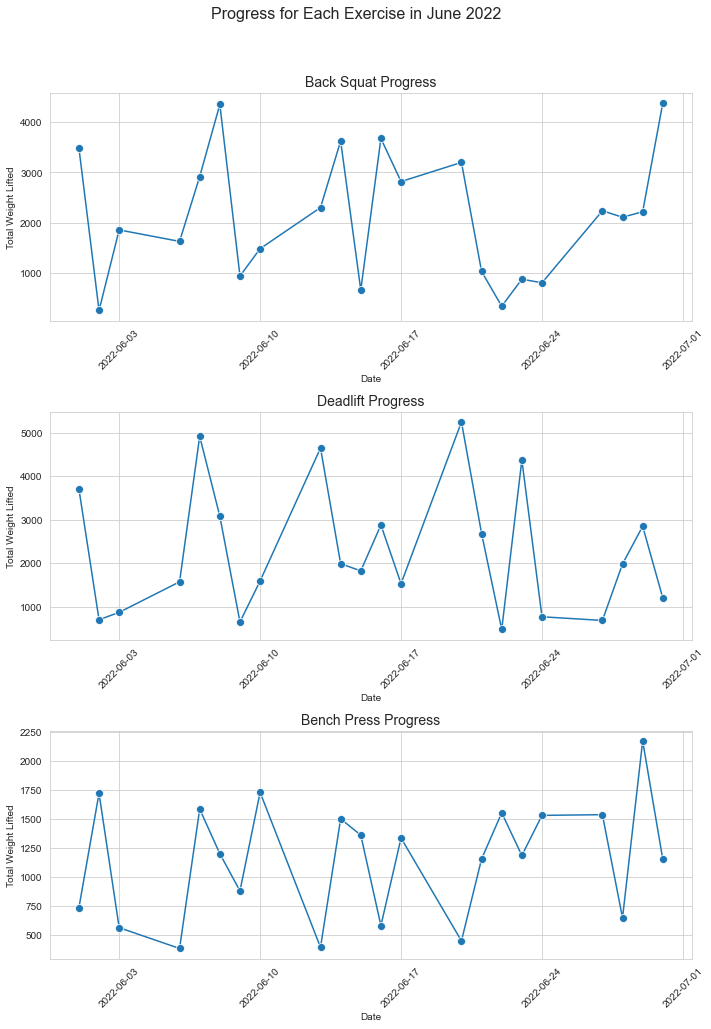

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Define the specific month to visualize
year = 2022
month = 6

# Read workout data from CSV file
workout_data = pd.read_csv('fake_workout_data.csv')
workout_data['date'] = pd.to_datetime(workout_data['date'])

# Filter data for the specific month
start_date = pd.Timestamp(year=year, month=month, day=1)
end_date = start_date + pd.DateOffset(months=1, days=-1)
workout_data = workout_data[(workout_data['date'] >= start_date) & (workout_data['date'] <= end_date)]

# Calculate the total weight lifted for each exercise
workout_data['total_weight'] = workout_data['weight'] * workout_data['sets'] * workout_data['reps']

# Group data by exercise and date
grouped_data = workout_data.groupby(['exercise', 'date']).sum().reset_index()

# Define exercises
exercises = ['Back Squat', 'Deadlift', 'Bench Press']

# Set Seaborn style
sns.set_style('whitegrid')

# Create a figure with subplots
fig, axs = plt.subplots(3, figsize=(10, 15))
fig.suptitle(f'Progress for Each Exercise in {start_date.strftime("%B %Y")}', fontsize=16)

# Plot progress for each exercise
for i, exercise in enumerate(exercises):
    exercise_data = grouped_data[grouped_data['exercise'] == exercise]
    sns.lineplot(data=exercise_data, x='date', y='total_weight', ax=axs[i], marker='o', markersize=8)
    axs[i].set_title(f'{exercise} Progress', fontsize=14)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Total Weight Lifted')
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    axs[i].xaxis.set_major_locator(mdates.DayLocator(interval=7))
    axs[i].tick_params(axis='x', rotation=45)

# Display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# More than 1 User

In [10]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set a seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define the start date, number of weeks, and users
start_date = datetime(2022, 4, 18)
num_weeks = 52
training_days_per_week = 5
users = ['user1', 'user2', 'user3', 'user4', 'user5']

# Define the exercises and weight ranges
exercises = ['Back Squat', 'Deadlift', 'Bench Press']
weight_ranges = {
    'Back Squat': (60, 150),
    'Deadlift': (80, 200),
    'Bench Press': (40, 100),
}

# Generate workout data
workout_data = []

for user in users:
    for week in range(num_weeks):
        for day in range(training_days_per_week):
            workout_date = start_date + timedelta(weeks=week, days=day)

            for exercise in exercises:
                weight_range = weight_ranges[exercise]
                min_weight, max_weight = weight_range
                weight = random.randint(min_weight, max_weight)
                sets = random.randint(3, 5)
                reps = random.randint(1, 8)

                workout_data.append({
                    'user_id': user,
                    'date': workout_date,
                    'exercise': exercise,
                    'weight': weight,
                    'sets': sets,
                    'reps': reps
                })

# Create a DataFrame and save it to a CSV file
workout_data_df = pd.DataFrame(workout_data)
workout_data_df.to_csv('fake_workout_data_multi_user.csv', index=False)


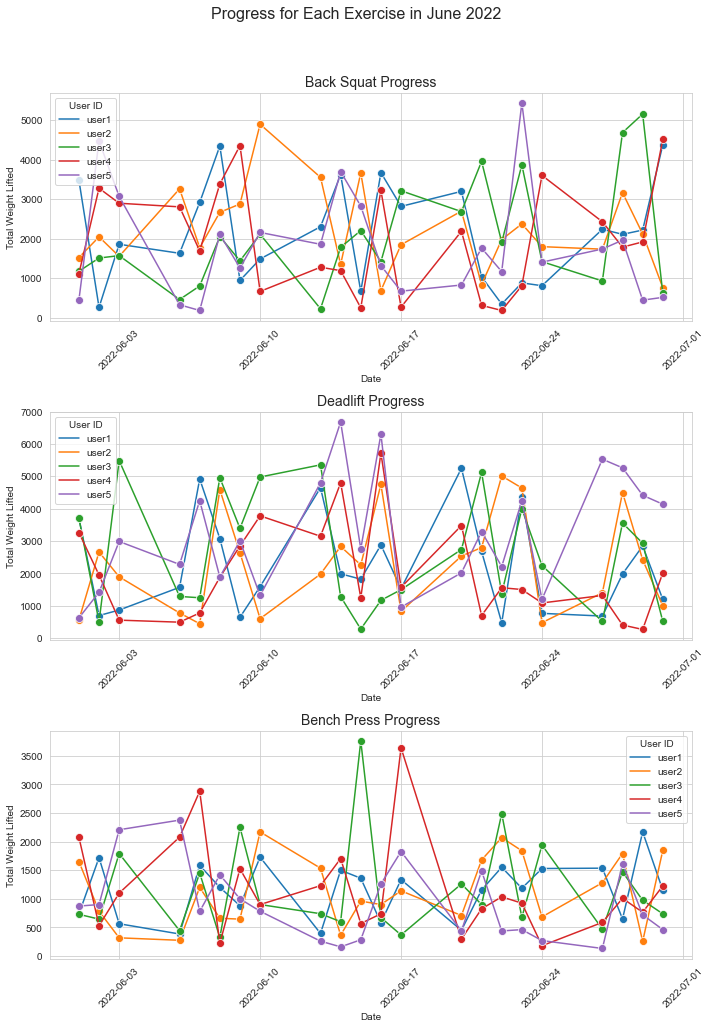

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Define the specific month to visualize
year = 2022
month = 6

# Read workout data from CSV file
workout_data = pd.read_csv('fake_workout_data_multi_user.csv')
workout_data['date'] = pd.to_datetime(workout_data['date'])

# Filter data for the specific month
start_date = pd.Timestamp(year=year, month=month, day=1)
end_date = start_date + pd.DateOffset(months=1, days=-1)
workout_data = workout_data[(workout_data['date'] >= start_date) & (workout_data['date'] <= end_date)]

# Calculate the total weight lifted for each exercise
workout_data['total_weight'] = workout_data['weight'] * workout_data['sets'] * workout_data['reps']

# Group data by user, exercise, and date
grouped_data = workout_data.groupby(['user_id', 'exercise', 'date']).sum().reset_index()

# Define exercises
exercises = ['Back Squat', 'Deadlift', 'Bench Press']

# Set Seaborn style
sns.set_style('whitegrid')

# Create a figure with subplots
fig, axs = plt.subplots(len(exercises), figsize=(10, 5 * len(exercises)))
fig.suptitle(f'Progress for Each Exercise in {start_date.strftime("%B %Y")}', fontsize=16)

# Plot progress for each exercise
for i, exercise in enumerate(exercises):
    exercise_data = grouped_data[grouped_data['exercise'] == exercise]
    sns.lineplot(data=exercise_data, x='date', y='total_weight', hue='user_id', ax=axs[i], marker='o', markersize=8)
    axs[i].set_title(f'{exercise} Progress', fontsize=14)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Total Weight Lifted')
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    axs[i].xaxis.set_major_locator(mdates.DayLocator(interval=7))
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend(title='User ID')

# Display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



## comparing the performences of too athlete

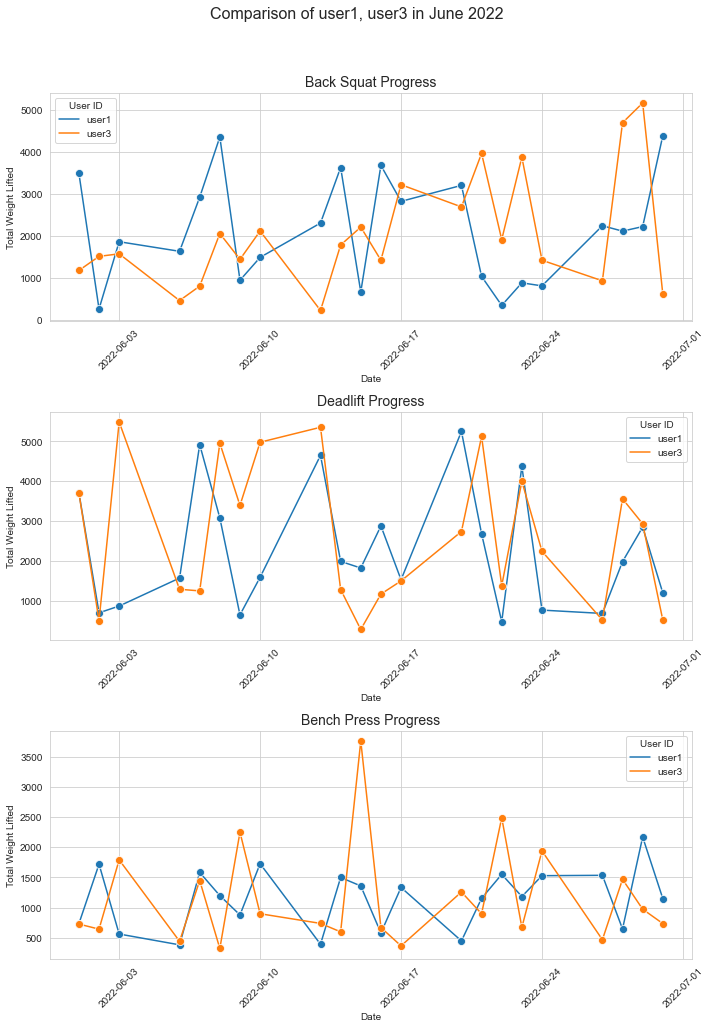

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Define the specific month to visualize and the user IDs of the athletes to compare
year = 2022
month = 6
selected_users = ['user1', 'user3']

# Read workout data from CSV file
workout_data = pd.read_csv('fake_workout_data_multi_user.csv')
workout_data['date'] = pd.to_datetime(workout_data['date'])

# Filter data for the specific month
start_date = pd.Timestamp(year=year, month=month, day=1)
end_date = start_date + pd.DateOffset(months=1, days=-1)
workout_data = workout_data[(workout_data['date'] >= start_date) & (workout_data['date'] <= end_date)]

# Filter data for the selected users
workout_data = workout_data[workout_data['user_id'].isin(selected_users)]

# Calculate the total weight lifted for each exercise
workout_data['total_weight'] = workout_data['weight'] * workout_data['sets'] * workout_data['reps']

# Group data by user, exercise, and date
grouped_data = workout_data.groupby(['user_id', 'exercise', 'date']).sum().reset_index()

# Define exercises
exercises = ['Back Squat', 'Deadlift', 'Bench Press']

# Set Seaborn style
sns.set_style('whitegrid')

# Create a figure with subplots
fig, axs = plt.subplots(len(exercises), figsize=(10, 5 * len(exercises)))
fig.suptitle(f'Comparison of {", ".join(selected_users)} in {start_date.strftime("%B %Y")}', fontsize=16)

# Plot progress for each exercise
for i, exercise in enumerate(exercises):
    exercise_data = grouped_data[grouped_data['exercise'] == exercise]
    sns.lineplot(data=exercise_data, x='date', y='total_weight', hue='user_id', ax=axs[i], marker='o', markersize=8)
    axs[i].set_title(f'{exercise} Progress', fontsize=14)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Total Weight Lifted')
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    axs[i].xaxis.set_major_locator(mdates.DayLocator(interval=7))
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend(title='User ID')

# Display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### over all performence of an athlete

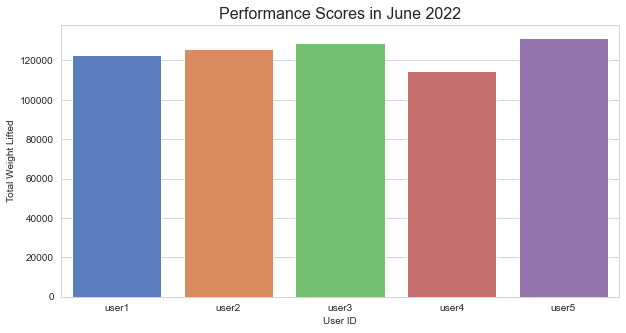

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the specific month to visualize
year = 2022
month = 6

# Read workout data from CSV file
workout_data = pd.read_csv('fake_workout_data_multi_user.csv')
workout_data['date'] = pd.to_datetime(workout_data['date'])

# Filter data for the specific month
start_date = pd.Timestamp(year=year, month=month, day=1)
end_date = start_date + pd.DateOffset(months=1, days=-1)
workout_data = workout_data[(workout_data['date'] >= start_date) & (workout_data['date'] <= end_date)]

# Calculate the total weight lifted for each exercise
workout_data['total_weight'] = workout_data['weight'] * workout_data['sets'] * workout_data['reps']

# Group data by user and exercise
grouped_data = workout_data.groupby(['user_id', 'exercise']).sum().reset_index()

# Calculate the performance score for each user
performance_scores = grouped_data.groupby('user_id')['total_weight'].sum().reset_index()

# Set Seaborn style
sns.set_style('whitegrid')

# Create a bar chart of the performance scores
plt.figure(figsize=(10, 5))
sns.barplot(data=performance_scores, x='user_id', y='total_weight', palette='muted')
plt.title(f'Performance Scores in {start_date.strftime("%B %Y")}', fontsize=16)
plt.xlabel('User ID')
plt.ylabel('Total Weight Lifted')

# Display the bar chart
plt.show()


In [ ]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from datetime import datetime

# Read existing workout data from CSV file
workout_data = pd.read_csv('fake_workout_data_multi_user.csv')
workout_data['date'] = pd.to_datetime(workout_data['date'])

# Function to add session data to the dataset
def add_session_data():
    try:
        # Read input from the entry fields
        user_id = user_id_entry.get()
        date = datetime.strptime(date_entry.get(), '%Y-%m-%d')
        exercise = exercise_var.get()
        weight = int(weight_entry.get())
        sets = int(sets_entry.get())
        reps = int(reps_entry.get())

        # Create a new DataFrame with the input data
        new_data = pd.DataFrame(
            [[user_id, date, exercise, weight, sets, reps]],
            columns=['user_id', 'date', 'exercise', 'weight', 'sets', 'reps']
        )

        # Append the new data to the existing dataset and save it to the CSV file
        global workout_data
        workout_data = workout_data.append(new_data, ignore_index=True)
        workout_data.to_csv('fake_workout_data_multi_user.csv', index=False)

        # Display a success message
        messagebox.showinfo("Success", "Session data added successfully.")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Initialize the tkinter window
window = tk.Tk()
window.title("CrossFit Progress Tracker")

# Create entry fields and labels for input
user_id_label = tk.Label(window, text="User ID:")
user_id_label.grid(row=0, column=0)
user_id_entry = tk.Entry(window)
user_id_entry.grid(row=0, column=1)

date_label = tk.Label(window, text="Date (YYYY-MM-DD):")
date_label.grid(row=1, column=0)
date_entry = tk.Entry(window)
date_entry.grid(row=1, column=1)

exercise_label = tk.Label(window, text="Exercise:")
exercise_label.grid(row=2, column=0)
exercise_var = tk.StringVar(window)
exercise_var.set("Back Squat")
exercise_entry = tk.OptionMenu(window, exercise_var, "Back Squat", "Deadlift", "Bench Press")
exercise_entry.grid(row=2, column=1)

weight_label = tk.Label(window, text="Weight:")
weight_label.grid(row=3, column=0)
weight_entry = tk.Entry(window)
weight_entry.grid(row=3, column=1)

sets_label = tk.Label(window, text="Sets:")
sets_label.grid(row=4, column=0)
sets_entry = tk.Entry(window)
sets_entry.grid(row=4, column=1)

reps_label = tk.Label(window, text="Reps:")
reps_label.grid(row=5, column=0)
reps_entry = tk.Entry(window)
reps_entry.grid(row=5, column=1)

# Create a button to add session data
add_button = tk.Button(window, text="Add Session Data", command=add_session_data)
add_button.grid(row=6, column=0, columnspan=2)

# Run the tkinter window
window.mainloop()


In [19]:
import kivy
from kivy.app import App
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.gridlayout import GridLayout
from kivy.uix.label import Label
from kivy.uix.textinput import TextInput
from kivy.uix.spinner import Spinner
from kivy.uix.button import Button
from kivy.uix.popup import Popup
import pandas as pd
from datetime import datetime

kivy.require('2.0.0')

workout_data = pd.read_csv('fake_workout_data_multi_user.csv')
workout_data['date'] = pd.to_datetime(workout_data['date'])

class AddSessionForm(GridLayout):
    def __init__(self, **kwargs):
        super(AddSessionForm, self).__init__(**kwargs)
        self.cols = 2

        self.add_widget(Label(text='User ID:'))
        self.user_id = TextInput(multiline=False)
        self.add_widget(self.user_id)

        self.add_widget(Label(text='Date (YYYY-MM-DD):'))
        self.date = TextInput(multiline=False)
        self.add_widget(self.date)

        self.add_widget(Label(text='Exercise:'))
        self.exercise = Spinner(text='Back Squat', values=('Back Squat', 'Deadlift', 'Bench Press'))
        self.add_widget(self.exercise)

        self.add_widget(Label(text='Weight:'))
        self.weight = TextInput(multiline=False)
        self.add_widget(self.weight)

        self.add_widget(Label(text='Sets:'))
        self.sets = TextInput(multiline=False)
        self.add_widget(self.sets)

        self.add_widget(Label(text='Reps:'))
        self.reps = TextInput(multiline=False)
        self.add_widget(self.reps)

        self.add_widget(Button(text='Add Session Data', on_press=self.add_session_data))

    def add_session_data(self, instance):
        try:
            user_id = self.user_id.text
            date = datetime.strptime(self.date.text, '%Y-%m-%d')
            exercise = self.exercise.text
            weight = int(self.weight.text)
            sets = int(self.sets.text)
            reps = int(self.reps.text)

            new_data = pd.DataFrame(
                [[user_id, date, exercise, weight, sets, reps]],
                columns=['user_id', 'date', 'exercise', 'weight', 'sets', 'reps']
            )

            global workout_data
            workout_data = workout_data.append(new_data, ignore_index=True)
            workout_data.to_csv('fake_workout_data_multi_user.csv', index=False)

            popup = Popup(title='Success', content=Label(text='Session data added successfully.'), size_hint=(None, None), size=(400, 200))
            popup.open()
        except Exception as e:
            popup = Popup(title='Error', content=Label(text=f'An error occurred: {str(e)}'), size_hint=(None, None), size=(400, 200))


[WARNING] [Config      ] Older configuration version detected (0 instead of 24)
[WARNING] [Config      ] Upgrading configuration in progress.
[INFO   ] [Logger      ] Record log in C:\Users\HP\.kivy\logs\kivy_23-04-15_0.txt
[INFO   ] [deps        ] Successfully imported "kivy_deps.angle" 0.3.3
[INFO   ] [deps        ] Successfully imported "kivy_deps.glew" 0.3.1
[INFO   ] [deps        ] Successfully imported "kivy_deps.sdl2" 0.4.5
[INFO   ] [Kivy        ] v2.1.0
[INFO   ] [Kivy        ] Installed at "C:\Users\HP\anaconda3\lib\site-packages\kivy\__init__.py"
[INFO   ] [Python      ] v3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
[INFO   ] [Python      ] Interpreter at "C:\Users\HP\anaconda3\python.exe"
[INFO   ] [Logger      ] Purge log fired. Processing...
[INFO   ] [Logger      ] Purge finished!
[INFO   ] [Factory     ] 189 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil (img_ffpyplayer ignored)
[INFO   ] [Text        ] Provide